In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import statistics
import pymysql
from sqlalchemy import create_engine
import getpass  
warnings.filterwarnings('ignore')
from collections import Counter
from seaborn import load_dataset
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn import neighbors 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


In [2]:
Hotels = pd.read_excel('List_hotels_BCN.xlsx')


In [3]:
Hotels.head()

,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,...,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿92168172158,Hotel Balmoral - HB-002606,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T04:56:34.725680+02:00,NaN,NaN,28000,Via Augusta,...,NaN,54731069,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960
1,﻿92168172239,Hotel Fornos - HB-000011,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.792593+02:00,NaN,NaN,34308,C Rambla,...,NaN,54731071,Hotels 2 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200
2,﻿92168172252,Hotel Granvía - HB-000012,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.742924+02:00,NaN,NaN,169409,G.V. Corts Catalanes,...,NaN,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740
3,﻿92168172321,Hotel Nouvel - HB-000078,NaN,NaN,1984-05-30T00:00:00+02:00,2022-09-17T04:56:39.771393+02:00,NaN,NaN,313006,C Santa Anna,...,NaN,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500
4,﻿139120246,Hotel Silken Sant Gervasi - HB-004054,NaN,NaN,2000-05-18T00:00:00+02:00,2022-09-17T02:16:39.631928+02:00,NaN,NaN,302203,C Sant Gervasi de Cassoles,...,NaN,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300


In [4]:
Hotels=Hotels.replace({"name": {"À": "A", "Á": "A", "Ä": "A", "à": "a", "á": "a","ä": "a", "È": "E", "É": "E", "Ë": "E", "è": "e", "é": "e", "ë": "e", "Ì": "I", "Í": "I", "Ï": "I", "ì": "i", "í": "i", "ï": "i", "Ò": "O", "Ó": "O", "Ö": "O", "ò": "o", "ó": "o", "ö": "o", "Ù": "U", "Ú": "U", "Ü": "U", "ù": "u", "ú": "u", "ü": "u", "ç": "c", "ñ": "n", "Ç": "C", "Ñ": "N","l·l": "ll","l.l": "ll"}}, regex=True)
#Other_Lodge=Other_Lodge.replace({"name": {"À": "A", "Á": "A", "Ä": "A", "à": "a", "á": "a","ä": "a", "È": "E", "É": "E", "Ë": "E", "è": "e", "é": "e", "ë": "e", "Ì": "I", "Í": "I", "Ï": "I", "ì": "i", "í": "i", "ï": "i", "Ò": "O", "Ó": "O", "Ö": "O", "ò": "o", "ó": "o", "ö": "o", "Ù": "U", "Ú": "U", "Ü": "U", "ù": "u", "ú": "u", "ü": "u", "ç": "c", "ñ": "n", "Ç": "C", "Ñ": "N", "·": "", "@": "", "$": "", "&": "i", "!": "", "%": "", "/: "", "+": ""}}, regex=True)

In [5]:
Hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   register_id                    441 non-null    object 
 1   name                           441 non-null    object 
 2   institution_id                 0 non-null      float64
 3   institution_name               0 non-null      float64
 4   created                        441 non-null    object 
 5   modified                       441 non-null    object 
 6   addresses_roadtype_id          0 non-null      float64
 7   addresses_roadtype_name        0 non-null      float64
 8   addresses_road_id              441 non-null    int64  
 9   addresses_road_name            441 non-null    object 
 10  addresses_start_street_number  439 non-null    float64
 11  addresses_end_street_number    13 non-null     float64
 12  addresses_neighborhood_id      441 non-null    int

In [6]:
#I drop all the columns with NaN values in all rows.

In [7]:
Hotels.drop(['register_id','institution_id','institution_name','addresses_roadtype_id','addresses_roadtype_name','addresses_type','values_description'], inplace=True, axis=1)

In [8]:
Hotels.head()

,name,created,modified,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_end_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,...,values_outstanding,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,Hotel Balmoral - HB-002606,1984-05-30T00:00:00+02:00,2022-09-17T04:56:34.725680+02:00,28000,Via Augusta,5.0,NaN,26,Sant Gervasi - Galvany,5,...,1.0,54731069,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960
1,Hotel Fornos - HB-000011,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.792593+02:00,34308,C Rambla,44.0,NaN,2,el Barri Gòtic,1,...,1.0,54731071,Hotels 2 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200
2,Hotel Granvia - HB-000012,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.742924+02:00,169409,G.V. Corts Catalanes,642.0,NaN,7,la Dreta de l'Eixample,2,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740
3,Hotel Nouvel - HB-000078,1984-05-30T00:00:00+02:00,2022-09-17T04:56:39.771393+02:00,313006,C Santa Anna,18.0,NaN,2,el Barri Gòtic,1,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-18T00:00:00+02:00,2022-09-17T02:16:39.631928+02:00,302203,C Sant Gervasi de Cassoles,26.0,NaN,25,Sant Gervasi - la Bonanova,5,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300


In [9]:
Hotels.isna().sum()/len(Hotels)

name                             0.000000
created                          0.000000
modified                         0.000000
addresses_road_id                0.000000
addresses_road_name              0.000000
addresses_start_street_number    0.004535
addresses_end_street_number      0.970522
addresses_neighborhood_id        0.000000
addresses_neighborhood_name      0.000000
addresses_district_id            0.000000
addresses_district_name          0.000000
addresses_zip_code               0.000000
addresses_town                   0.000000
addresses_main_address           0.000000
values_id                        0.002268
values_attribute_id              0.002268
values_category                  0.002268
values_attribute_name            0.002268
values_value                     0.002268
values_outstanding               0.002268
secondary_filters_id             0.000000
secondary_filters_name           0.000000
secondary_filters_fullpath       0.000000
secondary_filters_tree           0

In [10]:
# I drop as well the column with 97% of the values as NaN.
Hotels.drop(['addresses_end_street_number'], inplace=True, axis=1)

In [11]:
# I analysis the values 
Hotels['addresses_start_street_number'].nunique()

208

In [12]:
Hotels.addresses_start_street_number.value_counts(dropna=False)

1.0      12
9.0      11
11.0     11
7.0      10
19.0      9
         ..
670.0     1
125.0     1
89.0      1
543.0     1
380.0     1
Name: addresses_start_street_number, Length: 209, dtype: int64

In [13]:
print('Mode: {}'.format(Hotels.addresses_start_street_number.mode()))
print('Median: {}'.format(Hotels.addresses_start_street_number.median()))
print('Mean: {}'.format(Hotels.addresses_start_street_number.mean()))

Mode: 0    1.0
Name: addresses_start_street_number, dtype: float64
Median: 51.0
Mean: 124.48519362186788


In [14]:
Hotels['addresses_start_street_number']=Hotels['addresses_start_street_number'].fillna(1.0)

In [15]:
Hotels['values_id'].nunique()

440

In [16]:
print('Mode: {}'.format(Hotels.values_id.mode()))
print('Median: {}'.format(Hotels.values_id.median()))
print('Mean: {}'.format(Hotels.values_id.mean()))

Mode: 0      127771.0
1      129278.0
2      129569.0
3      130595.0
4      130841.0
         ...   
435    427916.0
436    429867.0
437    455480.0
438    455484.0
439    461196.0
Name: values_id, Length: 440, dtype: float64
Median: 210851.5
Mean: 192577.125


In [17]:
Hotels['values_id']=Hotels['values_id'].fillna(127771.0)

In [18]:
Hotels['values_attribute_id'].nunique()

6

In [19]:
print('Mode: {}'.format(Hotels.values_attribute_id.mode()))
print('Median: {}'.format(Hotels.values_attribute_id.median()))
print('Mean: {}'.format(Hotels.values_attribute_id.mean()))

Mode: 0    20001.0
Name: values_attribute_id, dtype: float64
Median: 20001.0
Mean: 20002.90227272727


In [20]:
Hotels['values_attribute_id']=Hotels['values_attribute_id'].fillna(20001.0)

In [21]:
Hotels['values_category'].nunique()

1

In [22]:
Hotels.values_category.value_counts(dropna=False)

Telèfons    440
NaN           1
Name: values_category, dtype: int64

In [23]:
Hotels['values_category']=Hotels['values_category'].fillna('Telèfons')

In [24]:
Hotels.values_attribute_name.value_counts(dropna=False)

Tel.                     326
Centraleta                94
Reserves                  10
Informació i reserves      5
Informació                 4
NaN                        1
Atenció al client          1
Name: values_attribute_name, dtype: int64

In [25]:
Hotels['values_attribute_name']=Hotels['values_attribute_name'].fillna('Tel.')

In [26]:
Hotels.values_value.value_counts(dropna=False)

900818320     5
934457657     2
644200680     2
931258622     2
932954652     2
             ..
934876292     1
934366115     1
932720050     1
933262499     1
93 3303030    1
Name: values_value, Length: 430, dtype: int64

In [27]:
print('Mode: {}'.format(Hotels.values_value.mode()))


Mode: 0    900818320
Name: values_value, dtype: object


In [28]:
Hotels['values_value']=Hotels['values_value'].fillna(900818320)

In [29]:
Hotels.values_outstanding.value_counts(dropna=False)

1.0    439
0.0      1
NaN      1
Name: values_outstanding, dtype: int64

In [30]:
Hotels['values_outstanding']=Hotels['values_outstanding'].fillna(1.0)

In [31]:
Hotels.isna().sum() 

name                             0
created                          0
modified                         0
addresses_road_id                0
addresses_road_name              0
addresses_start_street_number    0
addresses_neighborhood_id        0
addresses_neighborhood_name      0
addresses_district_id            0
addresses_district_name          0
addresses_zip_code               0
addresses_town                   0
addresses_main_address           0
values_id                        0
values_attribute_id              0
values_category                  0
values_attribute_name            0
values_value                     0
values_outstanding               0
secondary_filters_id             0
secondary_filters_name           0
secondary_filters_fullpath       0
secondary_filters_tree           0
secondary_filters_asia_id        0
geo_epgs_25831_x                 0
geo_epgs_25831_y                 0
geo_epgs_4326_x                  0
geo_epgs_4326_y                  0
dtype: int64

In [32]:
Hotels.name.value_counts(dropna=False)

Hotel Balmoral - HB-002606                         1
Hotel Barcelona Condal Mar by Melia - HB-004378    1
Hotel REC Barcelona - HB-004769                    1
Nobu Hotel Barcelona - HB-004350                   1
Hotel Eurostars Angli - HB-004300                  1
                                                  ..
Hotel Two by Axel - HB-004688                      1
Hotel America - HB-004153                          1
Hotel Sagrada Familia - HB-004201                  1
Hotel Catalonia Eixample 1864 - HB-004249          1
Hotel Antiga Casa Buenavista                       1
Name: name, Length: 441, dtype: int64

In [33]:
Hotels.head()

,name,created,modified,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,...,values_outstanding,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,Hotel Balmoral - HB-002606,1984-05-30T00:00:00+02:00,2022-09-17T04:56:34.725680+02:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,...,1.0,54731069,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960
1,Hotel Fornos - HB-000011,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.792593+02:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,...,1.0,54731071,Hotels 2 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200
2,Hotel Granvia - HB-000012,1984-05-30T00:00:00+02:00,2022-09-17T04:56:38.742924+02:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740
3,Hotel Nouvel - HB-000078,1984-05-30T00:00:00+02:00,2022-09-17T04:56:39.771393+02:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-18T00:00:00+02:00,2022-09-17T02:16:39.631928+02:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,...,1.0,54731070,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300


In [34]:
Hotels.dtypes

name                              object
created                           object
modified                          object
addresses_road_id                  int64
addresses_road_name               object
addresses_start_street_number    float64
addresses_neighborhood_id          int64
addresses_neighborhood_name       object
addresses_district_id              int64
addresses_district_name           object
addresses_zip_code                 int64
addresses_town                    object
addresses_main_address              bool
values_id                        float64
values_attribute_id              float64
values_category                   object
values_attribute_name             object
values_value                      object
values_outstanding               float64
secondary_filters_id               int64
secondary_filters_name            object
secondary_filters_fullpath        object
secondary_filters_tree             int64
secondary_filters_asia_id          int64
geo_epgs_25831_x

In [35]:
Hotels['created'] = pd.to_datetime(Hotels['created'], format = "%Y-%m-%dT%H:%M:%S%z", errors='ignore',utc=True)


In [36]:
Hotels.dtypes

name                                          object
created                          datetime64[ns, UTC]
modified                                      object
addresses_road_id                              int64
addresses_road_name                           object
addresses_start_street_number                float64
addresses_neighborhood_id                      int64
addresses_neighborhood_name                   object
addresses_district_id                          int64
addresses_district_name                       object
addresses_zip_code                             int64
addresses_town                                object
addresses_main_address                          bool
values_id                                    float64
values_attribute_id                          float64
values_category                               object
values_attribute_name                         object
values_value                                  object
values_outstanding                           f

In [37]:
Hotels['month_created'] = Hotels['created'].dt.month
Hotels['year_created'] = Hotels['created'].dt.year

In [38]:
Hotels.head(60)

,name,created,modified,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,...,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,2022-09-17T04:56:34.725680+02:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,...,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,2022-09-17T04:56:38.792593+02:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,...,Hotels 2 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,2022-09-17T04:56:38.742924+02:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,2022-09-17T04:56:39.771393+02:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,2022-09-17T02:16:39.631928+02:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000
5,BCN Urban Hotels Gran Ronda - HB-004557,2005-11-16 10:34:34+00:00,2022-09-17T06:31:23.803902+02:00,296508,Rda Sant Antoni,49.0,10,Sant Antoni,2,Eixample,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,4300593508849800,4581630959200870,4138316499424970,21635192734302100,11,2005
6,Hotel Villa Emilia by Katja & Antoine - HB-004329,2006-11-13 15:40:51+00:00,2022-09-17T06:38:56.641218+02:00,54509,C Calàbria,115.0,9,la Nova Esquerra de l'Eixample,2,Eixample,...,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,4292699336251550,4581318792083320,4138028439778810,21541153677803700,11,2006
7,Hotel HG City Suites Barcelona - HB-003821,1997-09-30 22:00:00+00:00,2022-09-17T05:34:00.705074+02:00,28000,Via Augusta,89.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,...,Hotels 4 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000001,4289507532452850,4583606999690720,41400865323262000,2150030176756050,9,1997
8,Hotel HCC Taber - HB-000317,1996-09-16 22:00:00+00:00,2022-09-17T02:38:41.436562+02:00,18505,C Aragó,256.0,7,la Dreta de l'Eixample,2,Eixample,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,43003490094953400,45824636010707904,4139066219821350,21631307242099900,9,1996
9,Hotel Evenia Rocafort - HB-004197,2003-12-03 12:24:03+00:00,2022-09-17T06:06:44.303951+02:00,285807,C Rocafort,25.0,10,Sant Antoni,2,Eixample,...,Hotels 3 estr.,Planol BCN >> Allotjament >> Hotels >> Hotels ...,651,65103001000002,4295222712657840,4580869954517110,4137626400901890,21571850375481800,12,2003


In [39]:
Hotels.drop(['modified'], inplace=True, axis=1)

In [40]:
Hotels.secondary_filters_name.value_counts(dropna=False)

Hotels 4 estr.    187
Hotels 3 estr.    121
Hotels 2 estr.     50
Hotels 5 estr.     44
Hotels 1 estr.     39
Name: secondary_filters_name, dtype: int64

In [41]:
def stars(x):
    if x in ['Hotels 5 estr.']:
        return '5'
    elif x in ['Hotels 4 estr.']:
        return '4'
    elif x in ['Hotels 3 estr.']:
        return '3'
    elif x in ['Hotels 2 estr.']:
        return '2'
    else:
        return '1'


In [42]:
Hotels['secondary_filters_name'] = list(map(stars, Hotels['secondary_filters_name']))

In [43]:
Hotels.secondary_filters_name.value_counts(dropna=False)

4    187
3    121
2     50
5     44
1     39
Name: secondary_filters_name, dtype: int64

In [44]:
Hotels=Hotels.rename(columns={'secondary_filters_name' : 'hotel_Rating'})

In [45]:
Hotels['hotel_Rating'] = Hotels['hotel_Rating'].astype(int)

In [46]:
Hotels.secondary_filters_fullpath.value_counts(dropna=False)

Planol BCN >> Allotjament >> Hotels >> Hotels 4 estr.    187
Planol BCN >> Allotjament >> Hotels >> Hotels 3 estr.    121
Planol BCN >> Allotjament >> Hotels >> Hotels 2 estr.     50
Planol BCN >> Allotjament >> Hotels >> Hotels 5 estr.     44
Planol BCN >> Allotjament >> Hotels >> Hotels 1 estr.     39
Name: secondary_filters_fullpath, dtype: int64

In [47]:
Hotels.drop(['secondary_filters_fullpath'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,secondary_filters_id,hotel_Rating,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,54731069,4,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,54731071,2,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,54731070,3,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,54731070,3,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,54731070,3,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [48]:
Hotels.secondary_filters_id.value_counts(dropna=False)

54731069    187
54731070    121
54731071     50
54731068     44
54731072     39
Name: secondary_filters_id, dtype: int64

In [49]:
Hotels.drop(['secondary_filters_id'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_outstanding,hotel_Rating,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,1.0,4,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,1.0,2,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,1.0,3,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,1.0,3,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,1.0,3,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [50]:
Hotels.values_outstanding.value_counts(dropna=False)

1.0    440
0.0      1
Name: values_outstanding, dtype: int64

In [51]:
Hotels.drop(['values_outstanding'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_value,hotel_Rating,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,932178700,4,651,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,933182024,2,651,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,933181900,3,651,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,933018274,3,651,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,932531740,3,651,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [52]:
Hotels.secondary_filters_tree.value_counts(dropna=False)

651    441
Name: secondary_filters_tree, dtype: int64

In [53]:
Hotels.drop(['secondary_filters_tree'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_attribute_name,values_value,hotel_Rating,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,Centraleta,932178700,4,65103001000001,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,Tel.,933182024,2,65103001000003,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,Tel.,933181900,3,65103001000002,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,Tel.,933018274,3,65103001000002,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,Centraleta,932531740,3,65103001000002,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [54]:
Hotels.secondary_filters_asia_id.value_counts(dropna=False)

65103001000001    187
65103001000002    121
65103001000003     50
65103001000000     44
65103001000004     39
Name: secondary_filters_asia_id, dtype: int64

In [55]:
Hotels.drop(['secondary_filters_asia_id'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_category,values_attribute_name,values_value,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,Telèfons,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,Telèfons,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,Telèfons,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,Telèfons,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,Telèfons,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [56]:
Hotels.values_category.value_counts(dropna=False)

Telèfons    441
Name: values_category, dtype: int64

In [57]:
Hotels.drop(['values_category'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_attribute_id,values_attribute_name,values_value,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,20003.0,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,20001.0,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,20001.0,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,20001.0,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,20003.0,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [58]:
Hotels.values_attribute_name.value_counts(dropna=False)

Tel.                     327
Centraleta                94
Reserves                  10
Informació i reserves      5
Informació                 4
Atenció al client          1
Name: values_attribute_name, dtype: int64

In [59]:
Hotels=Hotels.rename(columns={'values_attribute_name' : 'type_of_contact'})

In [60]:
Hotels.values_value.value_counts(dropna=False)

900818320     6
932157255     2
644200680     2
933437167     2
932954652     2
             ..
934876292     1
934366115     1
932720050     1
933262499     1
93 3303030    1
Name: values_value, Length: 429, dtype: int64

In [61]:
Hotels=Hotels.rename(columns={'values_value' : 'phone_number'})

In [62]:
Hotels.values_attribute_id.value_counts(dropna=False)

20001.0    327
20003.0     94
20040.0     10
20048.0      5
20006.0      4
20005.0      1
Name: values_attribute_id, dtype: int64

In [63]:
Hotels.drop(['values_attribute_id'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,values_id,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,172814.0,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,173928.0,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,172817.0,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,172819.0,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,129569.0,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [64]:
Hotels.values_id.value_counts(dropna=False)

127771.0    2
172814.0    1
213974.0    1
210642.0    1
215549.0    1
           ..
227382.0    1
158079.0    1
211947.0    1
205785.0    1
461196.0    1
Name: values_id, Length: 440, dtype: int64

In [65]:
Hotels.drop(['values_id'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,...,addresses_main_address,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,...,True,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,True,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,...,True,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,...,True,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,...,True,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [66]:
Hotels.addresses_main_address.value_counts(dropna=False)

True    441
Name: addresses_main_address, dtype: int64

In [67]:
Hotels.drop(['addresses_main_address'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,28000,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,BARCELONA,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,34308,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,169409,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,BARCELONA,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,313006,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,302203,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,BARCELONA,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [68]:
Hotels.addresses_road_id.value_counts(dropna=False)

169409    23
34308     19
144601    13
148307    12
250904     9
          ..
152508     1
172403     1
311703     1
73900      1
31707      1
Name: addresses_road_id, Length: 208, dtype: int64

In [69]:
Hotels.drop(['addresses_road_id'], inplace=True, axis=1)
Hotels.head()

,name,created,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral - HB-002606,1984-05-29 22:00:00+00:00,Via Augusta,5.0,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,BARCELONA,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos - HB-000011,1984-05-29 22:00:00+00:00,C Rambla,44.0,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia - HB-000012,1984-05-29 22:00:00+00:00,G.V. Corts Catalanes,642.0,7,la Dreta de l'Eixample,2,Eixample,8007,BARCELONA,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel - HB-000078,1984-05-29 22:00:00+00:00,C Santa Anna,18.0,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi - HB-004054,2000-05-17 22:00:00+00:00,C Sant Gervasi de Cassoles,26.0,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,BARCELONA,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [70]:
Hotels.dtypes

name                                          object
created                          datetime64[ns, UTC]
addresses_road_name                           object
addresses_start_street_number                float64
addresses_neighborhood_id                      int64
addresses_neighborhood_name                   object
addresses_district_id                          int64
addresses_district_name                       object
addresses_zip_code                             int64
addresses_town                                object
type_of_contact                               object
phone_number                                  object
hotel_Rating                                   int32
geo_epgs_25831_x                               int64
geo_epgs_25831_y                               int64
geo_epgs_4326_x                                int64
geo_epgs_4326_y                                int64
month_created                                  int64
year_created                                  

In [71]:
Hotels['addresses_start_street_number'] = Hotels['addresses_start_street_number'].astype(int)

In [72]:
Hotels.addresses_start_street_number.value_counts(dropna=False)

1      14
9      11
11     11
7      10
19      9
       ..
589     1
216     1
605     1
102     1
380     1
Name: addresses_start_street_number, Length: 208, dtype: int64

In [73]:
Hotels.dtypes

name                                          object
created                          datetime64[ns, UTC]
addresses_road_name                           object
addresses_start_street_number                  int32
addresses_neighborhood_id                      int64
addresses_neighborhood_name                   object
addresses_district_id                          int64
addresses_district_name                       object
addresses_zip_code                             int64
addresses_town                                object
type_of_contact                               object
phone_number                                  object
hotel_Rating                                   int32
geo_epgs_25831_x                               int64
geo_epgs_25831_y                               int64
geo_epgs_4326_x                                int64
geo_epgs_4326_y                                int64
month_created                                  int64
year_created                                  

In [74]:
Hotels['name']=Hotels.name.str.split('-', expand=True, regex=None)[0]


In [75]:
Hotels.head()

,name,created,addresses_road_name,addresses_start_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,type_of_contact,phone_number,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,Hotel Balmoral,1984-05-29 22:00:00+00:00,Via Augusta,5,26,Sant Gervasi - Galvany,5,Sarrià-Sant Gervasi,8006,BARCELONA,Centraleta,932178700,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,Hotel Fornos,1984-05-29 22:00:00+00:00,C Rambla,44,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933182024,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,Hotel Granvia,1984-05-29 22:00:00+00:00,G.V. Corts Catalanes,642,7,la Dreta de l'Eixample,2,Eixample,8007,BARCELONA,Tel.,933181900,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,Hotel Nouvel,1984-05-29 22:00:00+00:00,C Santa Anna,18,2,el Barri Gòtic,1,Ciutat Vella,8002,BARCELONA,Tel.,933018274,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,Hotel Silken Sant Gervasi,2000-05-17 22:00:00+00:00,C Sant Gervasi de Cassoles,26,25,Sant Gervasi - la Bonanova,5,Sarrià-Sant Gervasi,8022,BARCELONA,Centraleta,932531740,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [76]:
Hotels.describe().T

,count,mean,std,min,25%,50%,75%,max
addresses_start_street_number,441.0,1.239252e+02,1.659302e+02,1.000000e+00,1.400000e+01,5.100000e+01,1.570000e+02,7.000000e+02
addresses_neighborhood_id,441.0,1.480272e+01,1.892040e+01,1.000000e+00,3.000000e+00,7.000000e+00,1.900000e+01,7.100000e+01
addresses_district_id,441.0,3.011338e+00,2.664132e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01
addresses_zip_code,441.0,8.011819e+03,1.066957e+01,8.001000e+03,8.003000e+03,8.008000e+03,8.018000e+03,8.041000e+03
hotel_Rating,441.0,3.333333e+00,1.087115e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
geo_epgs_25831_x,441.0,1.983381e+16,1.931371e+16,4.300981e+08,4.299047e+15,4.314436e+15,4.302515e+16,4.347562e+16
geo_epgs_25831_y,441.0,6.605076e+15,9.689931e+15,4.581697e+09,4.581429e+15,4.582114e+15,4.583084e+15,4.586389e+16
geo_epgs_4326_x,441.0,1.463461e+16,1.716081e+16,4.137531e+13,4.138310e+15,4.139187e+15,4.138032e+16,4.143533e+16
geo_epgs_4326_y,441.0,1.195829e+16,9.873678e+15,2.173087e+11,2.166455e+15,2.113853e+16,2.169321e+16,2.211980e+16
month_created,441.0,7.077098e+00,2.958569e+00,1.000000e+00,5.000000e+00,8.000000e+00,9.000000e+00,1.200000e+01


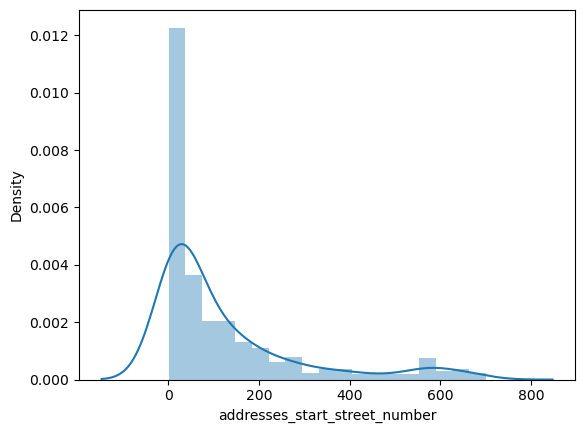

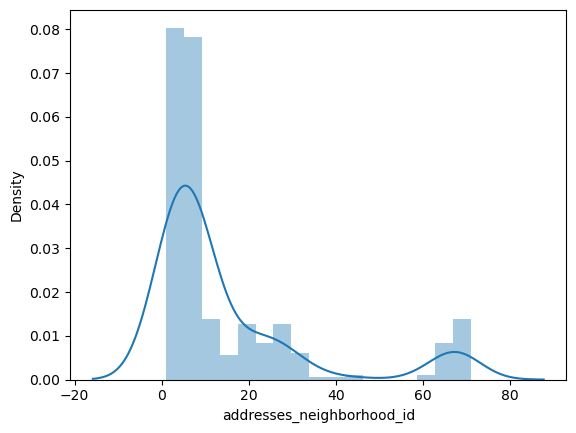

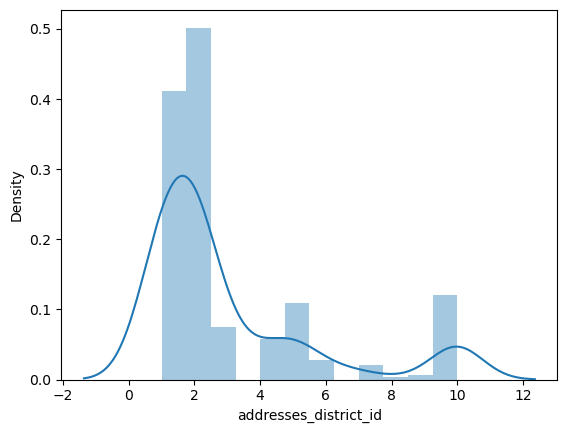

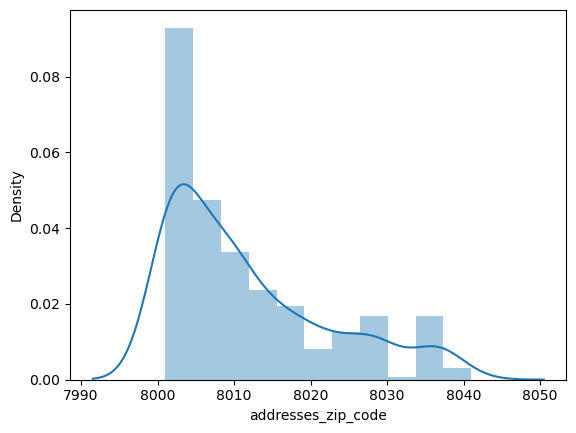

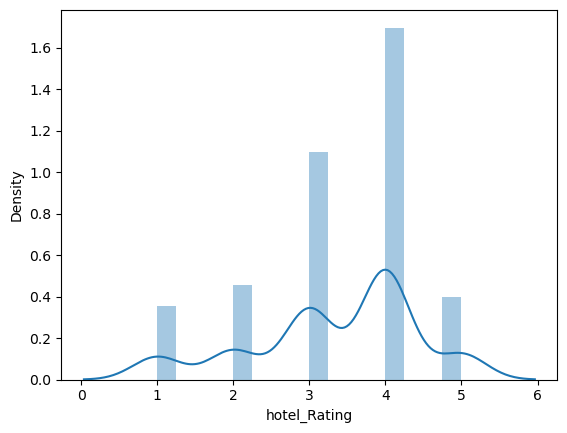

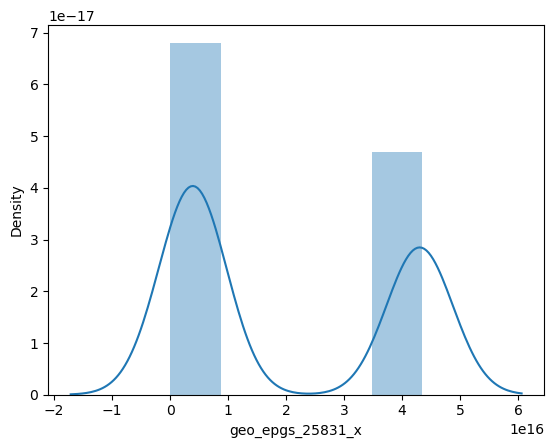

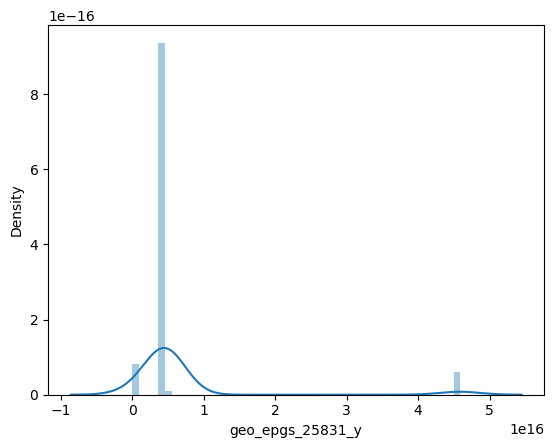

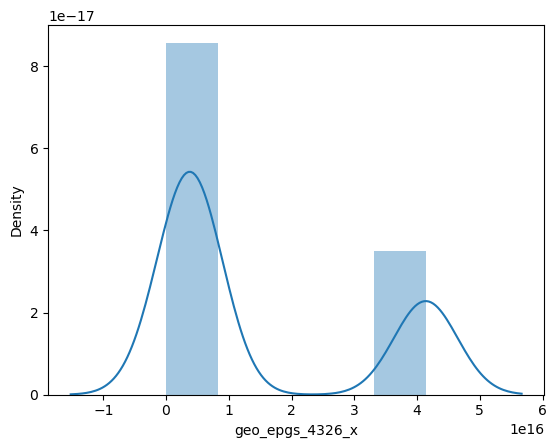

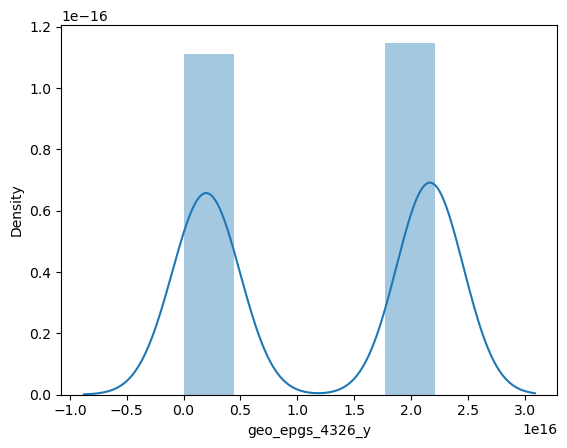

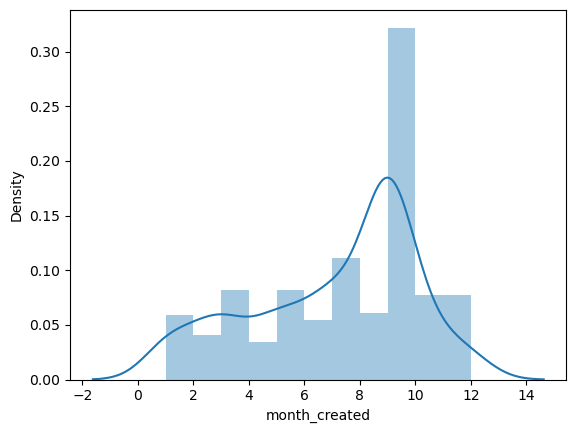

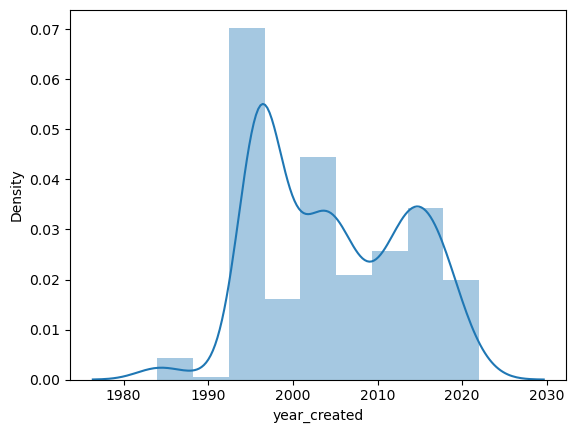

In [77]:
Hotels_numerical = Hotels.select_dtypes(np.number)

for column in Hotels_numerical.columns:
    sns.distplot(Hotels_numerical[column])
    plt.show()


In [78]:
Hotels_numerical.head()


,addresses_start_street_number,addresses_neighborhood_id,addresses_district_id,addresses_zip_code,hotel_Rating,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y,month_created,year_created
0,5,26,5,8006,4,42937703921294704,4583085639865460,4139620718347950,2155190161506960,5,1984
1,44,2,1,8002,2,43100882773755600,4581225140356750,4137959188566090,21749199534758200,5,1984
2,642,7,2,8007,3,43056889077459200,4582390495894150,4139005003654940,2169525637778740,5,1984
3,18,2,1,8002,3,43073264629176704,4581861958085160,4138530378088550,21715445758064500,5,1984
4,26,25,5,8022,3,42802010219409800,4584043072241010,41404710071918704,21388460431523300,5,2000


In [82]:
Hotels_categorical = Hotels.select_dtypes(object)
Hotels_categorical.head(60)

,name,addresses_road_name,addresses_neighborhood_name,addresses_district_name,addresses_town,type_of_contact,phone_number
0,Hotel Balmoral,Via Augusta,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,BARCELONA,Centraleta,932178700
1,Hotel Fornos,C Rambla,el Barri Gòtic,Ciutat Vella,BARCELONA,Tel.,933182024
2,Hotel Granvia,G.V. Corts Catalanes,la Dreta de l'Eixample,Eixample,BARCELONA,Tel.,933181900
3,Hotel Nouvel,C Santa Anna,el Barri Gòtic,Ciutat Vella,BARCELONA,Tel.,933018274
4,Hotel Silken Sant Gervasi,C Sant Gervasi de Cassoles,Sant Gervasi - la Bonanova,Sarrià-Sant Gervasi,BARCELONA,Centraleta,932531740
5,BCN Urban Hotels Gran Ronda,Rda Sant Antoni,Sant Antoni,Eixample,BARCELONA,Tel.,933271800
6,Hotel Villa Emilia by Katja & Antoine,C Calàbria,la Nova Esquerra de l'Eixample,Eixample,BARCELONA,Tel.,932525285
7,Hotel HG City Suites Barcelona,Via Augusta,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,BARCELONA,Tel.,932373940
8,Hotel HCC Taber,C Aragó,la Dreta de l'Eixample,Eixample,BARCELONA,Centraleta,934873887
9,Hotel Evenia Rocafort,C Rocafort,Sant Antoni,Eixample,BARCELONA,Informació,932892400


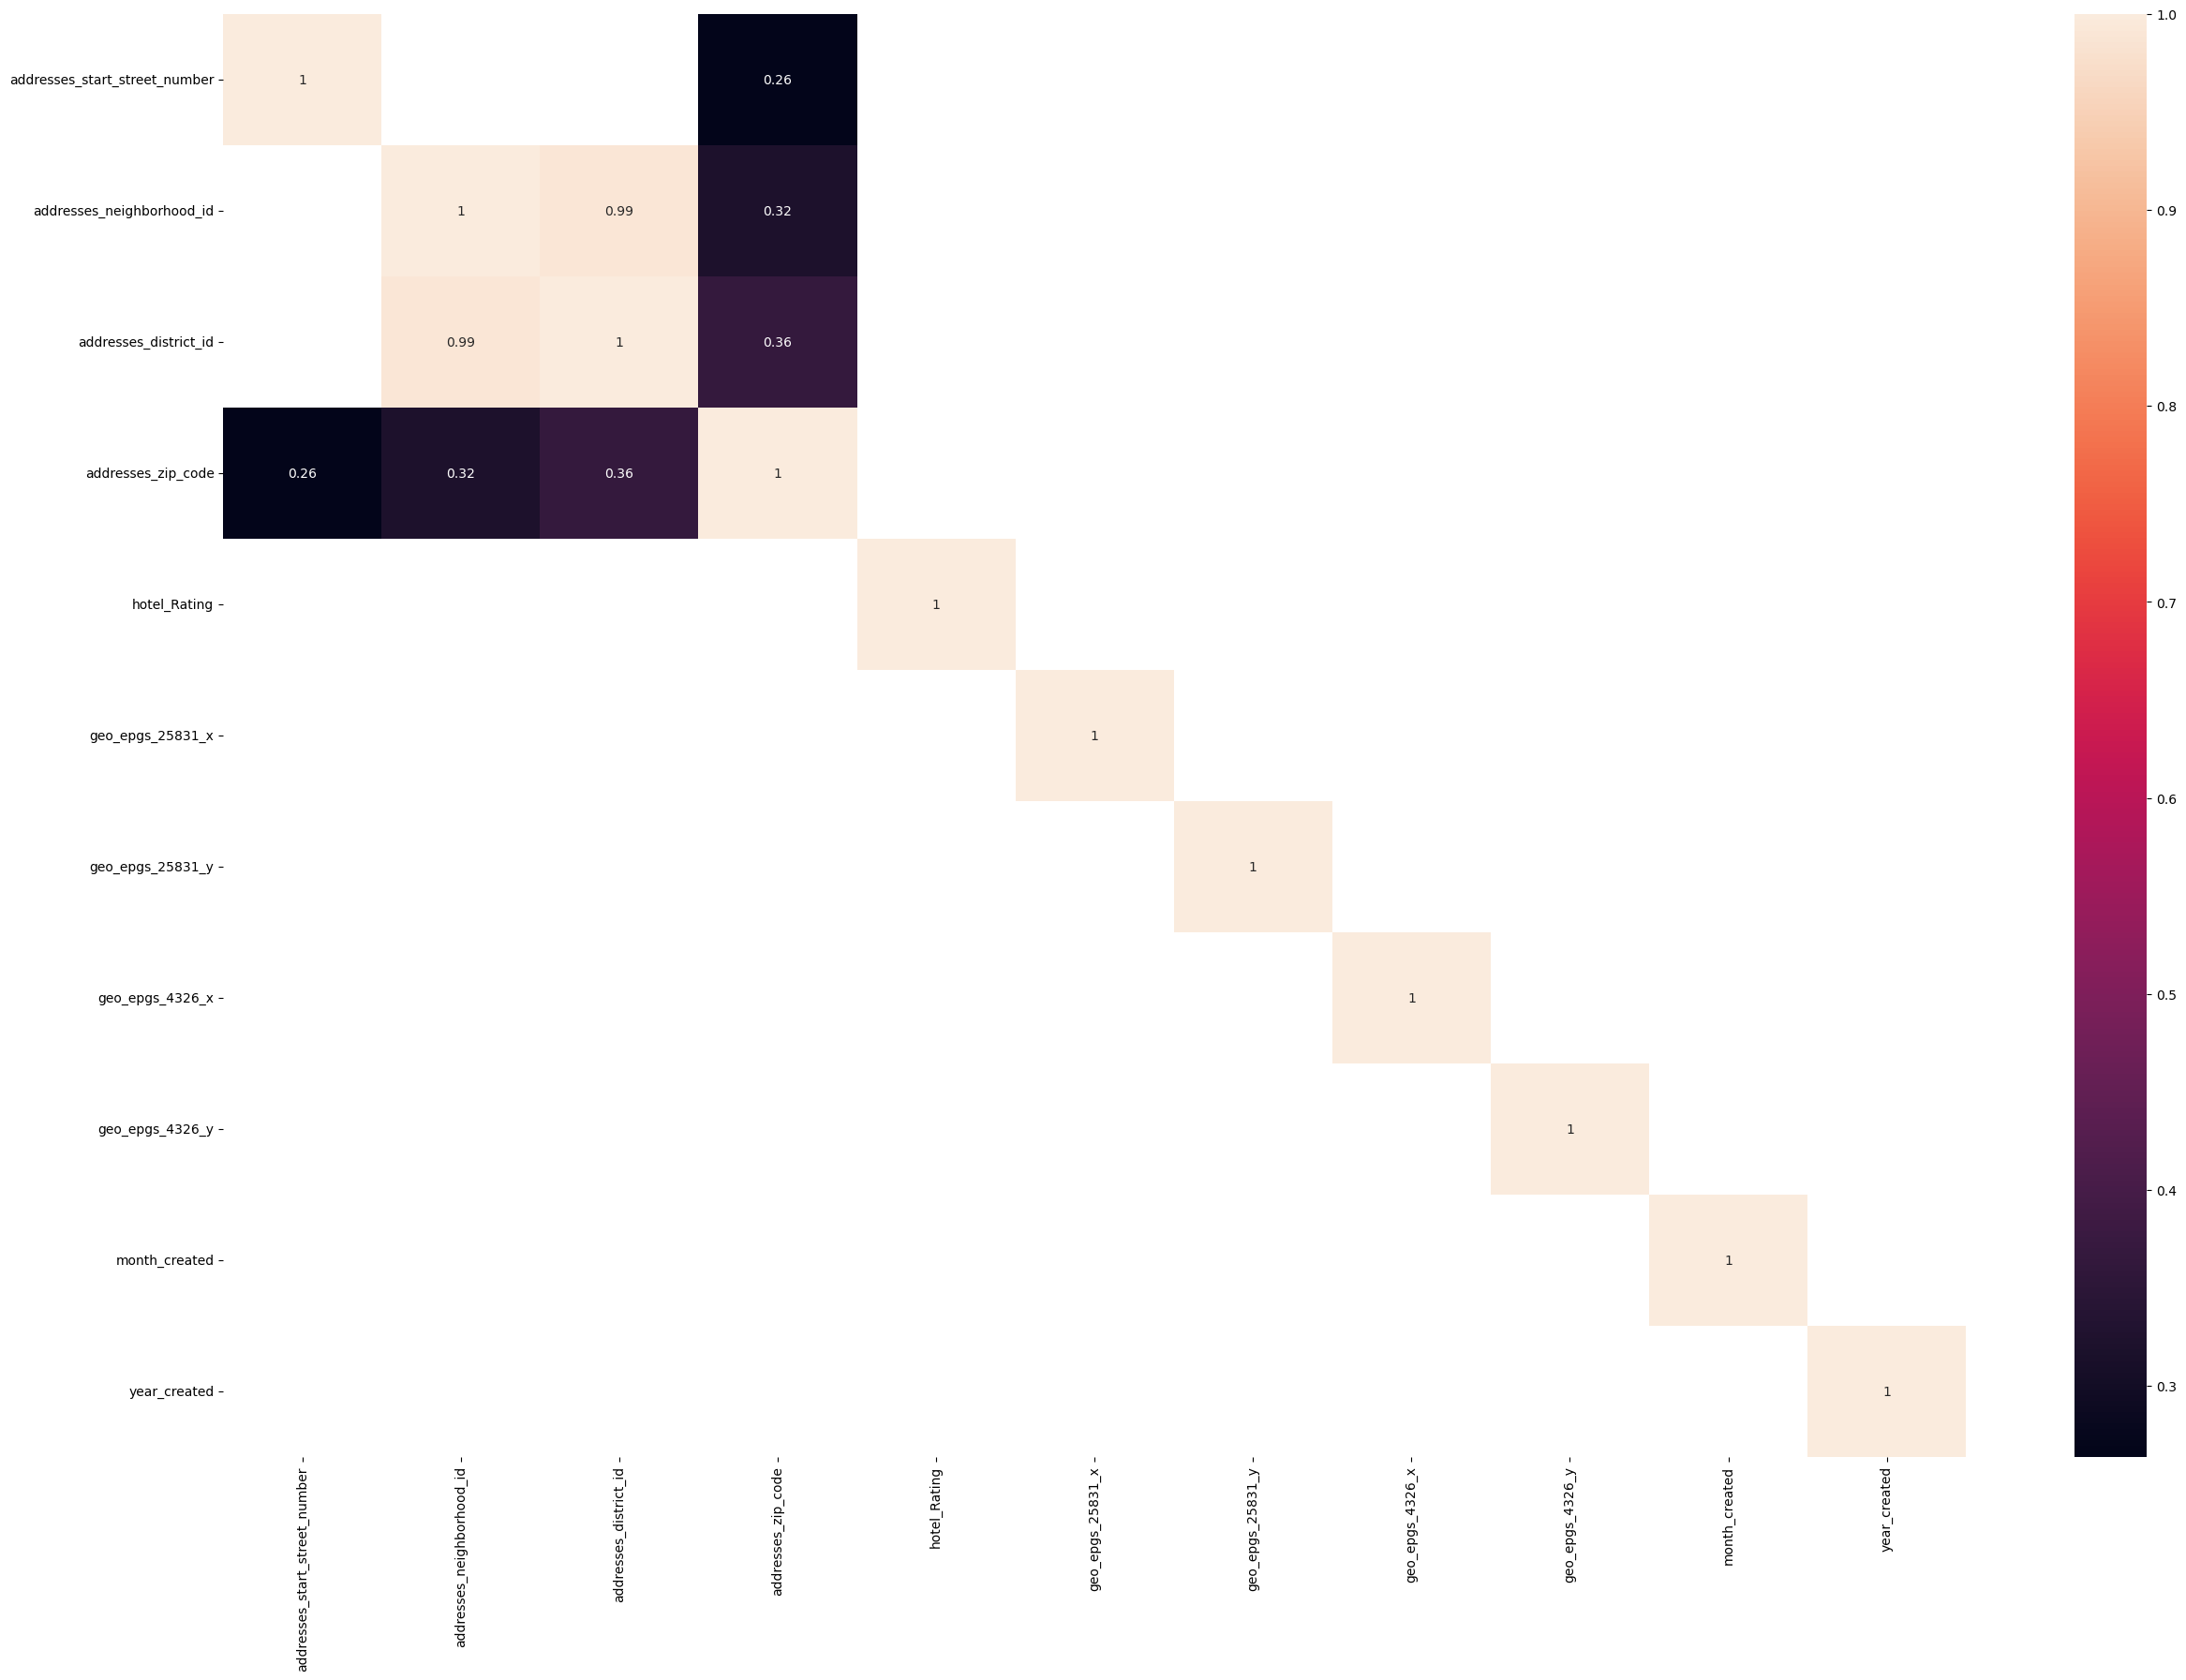

In [80]:
corova = Hotels.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corova, annot=True, mask=(np.abs(corova) <= 0.2))
plt.show()


In [81]:
Hotels.to_csv('Hotels_cleaned.csv', index=False,sep=',',encoding='utf-8')
